In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy import stats
import pandas as pd
import ast
from collections import Counter
from src.Clase_Andres import DataFrameHelper
from src.data_cleaning import (
    convert_to_json, unnest_column, extract_genre_names,
    preprocess_column, extract_tag_names, extract_store_names, extract_main_genre, categorize_metacritic
)

In [3]:
url = '../data/raw/juegos_rawg.csv'
data = pd.read_csv(url)

## Exploracion Inicial

In [4]:
df = data.copy()

In [5]:
helper = DataFrameHelper(df)
print("Información del dataset:")
helper.info()
print("Primeras filas:")
print(helper.head())
print("Valores nulos por columna:")
print(helper.missing_values())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5222 entries, 0 to 5221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   slug                5222 non-null   object 
 1   name                5222 non-null   object 
 2   playtime            5222 non-null   int64  
 3   platforms           5222 non-null   object 
 4   stores              5198 non-null   object 
 5   released            5222 non-null   object 
 6   tba                 5222 non-null   bool   
 7   background_image    5221 non-null   object 
 8   rating              5222 non-null   float64
 9   rating_top          5222 non-null   int64  
 10  ratings             5222 non-null   object 
 11  ratings_count       5222 non-null   int64  
 12  reviews_text_count  5222 non-null   int64  
 13  added               5222 non-null   int64  
 14  added_by_status     5111 non-null   object 
 15  metacritic          1894 non-n

In [6]:
df.tail()

,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,...,tags,esrb_rating,user_game,reviews_count,saturated_color,dominant_color,short_screenshots,parent_platforms,genres,community_rating
5217,the-otterman-empire,The Otterman Empire,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2020-07-02,False,https://media.rawg.io/media/screenshots/019/01...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 1, 'name': 'Everyone', 'slug': 'everyon...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 40, 'name': 'Casual', 'slug': 'casual'...",0.0
5218,jacks-or-better-video-poker,Jacks or Better - Video Poker,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2020-06-12,False,https://media.rawg.io/media/screenshots/0e7/0e...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 40, 'name': 'Casual', 'slug': 'casual'...",0.0
5219,jumanji-the-curse-returns,Jumanji: The Curse Returns,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2021-09-01,True,https://media.rawg.io/media/screenshots/eea/ee...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",0.0
5220,avocuddle,AvoCuddle,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2019-07-12,False,https://media.rawg.io/media/screenshots/df2/df...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 51, 'name': 'Indie', 'slug': 'indie'},...",0.0
5221,tarzan-vr,Tarzan VR,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2020-11-17,False,https://media.rawg.io/media/games/64a/64a11dd3...,0.0,0,...,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 3, 'name': 'Teen', 'slug': 'teen', 'nam...",NaN,0,0f0f0f,0f0f0f,"[{'id': -1, 'image': 'https://media.rawg.io/me...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 3, 'name': 'Adventure', 'slug': 'adven...",0.0


In [7]:
df.shape

(5222, 31)

# Eliminar colummnas irrelevantes

In [8]:
df.drop(columns=['score', 'clip', 'user_game', 'background_image', 'short_screenshots', 
                   'saturated_color', 'dominant_color', 'parent_platforms', 'platforms','tba', 'community_rating', 'esrb_rating'],inplace=True)


In [9]:
print(df.columns)

Index(['slug', 'name', 'playtime', 'stores', 'released', 'rating',
       'rating_top', 'ratings', 'ratings_count', 'reviews_text_count', 'added',
       'added_by_status', 'metacritic', 'suggestions_count', 'updated', 'id',
       'tags', 'reviews_count', 'genres'],
      dtype='object')


| Columna              | Descripción                                                                                     | Observaciones                                                                                               |
|----------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------
| slug                | Identificador único en formato texto para cada juego.                                           | Es útil para identificar juegos de forma única, pero no es legible para el usuario.                        |
| name                | Nombre completo del juego.                                                                      | Información principal y visible para el usuario.                                                           |
| playtime            | Tiempo promedio de juego en horas.                                                              | Puede contener valores bajos o nulos para juegos menos populares.                                          |
| stores              | Tiendas donde el juego está disponible, en formato JSON.                                        | Requiere desanidar para obtener datos como nombres de tiendas o URLs específicas.                          |
| released            | Fecha de lanzamiento del juego.                                                                 | Puede contener valores nulos para juegos aún no lanzados.                                                  |
| rating              | Calificación promedio del juego (en base a opiniones de usuarios).                              | Es una métrica importante de calidad, pero debe analizarse junto a `ratings_count` para contexto.          |
| rating_top          | Calificación máxima disponible (e.g., 5 estrellas).                                             | Puede ser redundante, pero útil para verificar si un juego alcanza la calificación máxima.                 |
| ratings             | Detalle de calificaciones divididas en varias categorías, en formato JSON.                      | Es necesario desanidar para análisis detallado, como "exceptional", "recommended", etc.                    |
| ratings_count       | Número total de calificaciones recibidas.                                                       | Complementa a `rating` y da contexto sobre la cantidad de usuarios que calificaron.                        |
| reviews_text_count  | Número de reseñas que incluyen texto.                                                           | Útil para análisis de sentimientos o revisiones detalladas.                                                |
| added               | Total de veces que el juego fue agregado a listas de usuarios.                                  | Es una métrica de popularidad que puede correlacionar con `playtime` o `ratings_count`.                    |
| added_by_status     | Detalles sobre cómo los usuarios clasificaron el juego, en formato JSON.                        | Requiere procesamiento adicional para dividir categorías como "owned", "beaten", etc.                      |
| metacritic          | Puntuación promedio en Metacritic.                                                              | Métrica externa de calidad, puede no estar presente para algunos juegos.                                   |
| suggestions_count   | Número de juegos sugeridos similares.                                                           | Puede indicar qué tan conectado está un juego con otros en términos de género o popularidad.               |
| updated             | Última fecha de actualización de los datos del juego.                                           | Indica la frescura de los datos, especialmente relevante para juegos en desarrollo o con DLC recientes.    |
| id                  | Identificador único del juego.                                                                  | Esencial para uniones o referencias cruzadas con otras tablas.                                             |
| tags                | Etiquetas asociadas al juego, en formato JSON.                                                  | Requiere desanidar para obtener insights como características o temáticas comunes.                         |
| reviews_count       | Número total de reseñas.                                                                        | Complementa `reviews_text_count`, puede incluir reseñas con y sin texto.                                   |
| genres              | Géneros a los que pertenece el juego, en formato JSON.                                          | Necesita desanidarse para obtener información granular sobre géneros.                                      |


# Aplicamos un convert json a las columnas

In [10]:
from src.data_cleaning import convert_to_json
df['stores'] = df['stores'].apply(convert_to_json)
df['ratings'] = df['ratings'].apply(convert_to_json)
df['tags'] = df['tags'].apply(convert_to_json)
df['genres'] = df['genres'].apply(convert_to_json)

# Tratamiento de los datos

## Valores de generos, nombre de generos

In [11]:
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df['release_year'] = df['released'].dt.year

In [12]:
from src.data_cleaning import extract_main_genre
df['main_genre'] = df['genres'].apply(extract_main_genre)


In [13]:
df["genre_names"] = df["genres"].apply(extract_genre_names)
df["tags_names"] = df["tags"].apply(extract_tag_names)
df["store_names"] = df["stores"].apply(extract_store_names)

# Imputamos valores de Metacritic

In [14]:
median_metacritic = df.groupby(['release_year', 'main_genre'])['metacritic'].median()

def impute_metacritic(row):
    if pd.isna(row['metacritic']):
        return median_metacritic.get((row['release_year'], row['main_genre']), df['metacritic'].median())
    return row['metacritic']

df['metacritic'] = df.apply(impute_metacritic, axis=1)

global_median_metacritic = df['metacritic'].median()
df['metacritic'].fillna(global_median_metacritic, inplace=True)

C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3099579524.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['metacritic'].fillna(global_median_metacritic, inplace=True)


### Creamos metacritic category

In [15]:
from src.data_cleaning import categorize_metacritic
df["metacritic_category"] = df["metacritic"].apply(categorize_metacritic)

## Convertimos colummnas de fecha a formato datetime

In [16]:
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df['updated'] = pd.to_datetime(df['updated'], errors='coerce')

## Desanidamos la colummnas

In [17]:
from src.data_cleaning import unnest_column

df_ratings = unnest_column(df, 'ratings')
df_tags = unnest_column(df, 'tags')
df_stores = unnest_column(df, 'stores')
df_genres = unnest_column(df, 'genres')

#### Eliminar valores Originales y entre otras que no hacen falta

In [18]:
df.drop(columns=['stores', 'ratings', 'tags', 'genres', 'id', 'added_by_status', "genre_names", "store_names", "tags_names"], inplace=True)

## Optimizamos la memoria

In [19]:
df['ratings_count'] = df['ratings_count'].astype('int32')
df['reviews_count'] = df['reviews_count'].astype('int32')
df['suggestions_count'] = df['suggestions_count'].astype('int32')
df['added'] = df['added'].astype('int32')
df['reviews_text_count'] = df['reviews_text_count'].astype('int32')

df['rating'] = df['rating'].astype('float32')
df['metacritic'] = df['metacritic'].astype('float32')

df['metacritic_category'] = df['metacritic_category'].astype('category')

# Manejo de valores nulos

In [20]:
df.fillna({
    'metacritic': df['metacritic'].median(),
    'rating': df['rating'].median(),
    'released': df['released'].min(),
    'updated': df['updated'].max(),
}, inplace=True)


## Categorizamos metacrtic

In [21]:
df['metacritic_category'] = df['metacritic'].apply(categorize_metacritic)

## Hcaemos un describe

In [22]:
df.describe()

,playtime,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,suggestions_count,updated,reviews_count,release_year
count,5222.000000,5222,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222,5222.000000,5222.000000
mean,3.311949,2018-02-12 00:24:49.084641792,2.049284,2.271735,140.648028,1.267331,900.679433,74.220322,343.419571,2023-04-13 13:04:19.299119104,142.556492,2017.602834
min,0.000000,2000-02-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,2019-01-09 12:41:06,0.000000,2000.000000
25%,1.000000,2016-05-13 00:00:00,0.000000,0.000000,2.000000,0.000000,29.000000,72.000000,215.000000,2022-01-19 04:31:05.500000,2.000000,2016.000000
50%,2.000000,2018-06-01 00:00:00,2.830000,3.000000,11.000000,0.000000,156.000000,74.000000,324.000000,2023-12-20 12:58:54,12.000000,2018.000000
75%,4.000000,2020-06-12 00:00:00,3.580000,4.000000,70.000000,1.000000,843.000000,77.000000,456.000000,2024-11-08 17:25:59.750000128,71.000000,2020.000000
max,186.000000,2024-12-31 00:00:00,4.710000,5.000000,6965.000000,79.000000,21632.000000,96.000000,1719.000000,2024-12-25 08:54:56,7073.000000,2024.000000
std,6.309711,NaN,1.725586,1.902700,418.082248,4.150511,1905.044868,6.649771,175.648483,NaN,423.320583,3.364764


## Detectar y manejar outliers en `playtime`, `ratings_count`, `reviews_count`
- Aplicar método de IQR para detección de outliers

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

outlier_columns = ['playtime', 'ratings_count', 'reviews_count']
for col in outlier_columns:
    df = remove_outliers(df, col)

In [24]:
df.to_csv("Juegorawg_limpio.csv", index=False)

# Analisis Exploratorio

In [25]:
df.describe(include='all')

,slug,name,playtime,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,suggestions_count,updated,reviews_count,release_year,main_genre,metacritic_category
count,3768,3768,3768.000000,3768,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768,3768.000000,3768.000000,3768,3768
unique,3768,3768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,3
top,tarzan-vr,Tarzan VR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indie,Media
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1525,3377
mean,NaN,NaN,2.039544,2018-08-30 05:20:15.286624256,1.506927,1.711783,12.183652,0.183386,188.545913,73.345276,307.114384,2022-09-25 16:56:58.692675072,12.461253,2018.149947,NaN,NaN
min,NaN,NaN,0.000000,2000-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,2019-01-09 12:41:06,0.000000,2000.000000,NaN,NaN
25%,NaN,NaN,0.000000,2016-11-30 18:00:00,0.000000,0.000000,1.000000,0.000000,16.000000,72.000000,193.000000,2020-12-16 14:58:33.750000128,1.000000,2016.000000,NaN,NaN
50%,NaN,NaN,2.000000,2018-10-08 12:00:00,0.000000,1.000000,4.500000,0.000000,74.000000,74.000000,288.500000,2023-04-24 22:00:09.500000,5.000000,2018.000000,NaN,NaN
75%,NaN,NaN,3.000000,2020-08-11 06:00:00,3.200000,4.000000,17.000000,0.000000,235.000000,76.000000,411.000000,2024-05-14 16:26:29.249999872,18.000000,2020.000000,NaN,NaN
max,NaN,NaN,8.000000,2024-12-31 00:00:00,4.710000,5.000000,68.000000,8.000000,2182.000000,92.000000,1354.000000,2024-12-24 23:49:58,68.000000,2024.000000,NaN,NaN


## Variables Numericas

In [26]:
numeric_cols = ['playtime', 'ratings_count', 'reviews_count', 'metacritic', 'rating']

### Prueba de normalidad

In [27]:
from scipy.stats import shapiro, normaltest, anderson
from collections import Counter
import numpy as np

In [ ]:
def normality_tests(column):
    print(f"\nPruebas de normalidad para {column}:")
 
    stat, p_value = stats.shapiro(df[column].dropna())
    print(f"Shapiro-Wilk test: Stat={stat:.4f}, p-value={p_value:.4f}")
    
  
    stat, p_value = stats.kstest(df[column].dropna(), 'norm')
    print(f"Kolmogorov-Smirnov test: Stat={stat:.4f}, p-value={p_value:.4f}")
    
    
    result = stats.anderson(df[column].dropna(), dist='norm')
    print(f"Anderson-Darling test: Stat={result.statistic:.4f}")
    print("Critical values:", result.critical_values)
    print("Significance levels:", result.significance_level)


In [29]:
normality_tests('rating')
normality_tests('metacritic')
normality_tests('playtime')


Pruebas de normalidad para rating:
Shapiro-Wilk test: Stat=0.7508, p-value=0.0000
Kolmogorov-Smirnov test: Stat=0.5000, p-value=0.0000
Anderson-Darling test: Stat=436.8899
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Pruebas de normalidad para metacritic:
Shapiro-Wilk test: Stat=0.7841, p-value=0.0000
Kolmogorov-Smirnov test: Stat=1.0000, p-value=0.0000
Anderson-Darling test: Stat=206.8780
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Pruebas de normalidad para playtime:
Shapiro-Wilk test: Stat=0.8960, p-value=0.0000
Kolmogorov-Smirnov test: Stat=0.5754, p-value=0.0000
Anderson-Darling test: Stat=121.8543
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]


# Pruebas de Normalidad

## Rating
- **Shapiro-Wilk test:** p-value = 0.0000 → Rechazamos la hipótesis nula de normalidad.
- **Kolmogorov-Smirnov test:** p-value = 0.0000 → También rechaza la normalidad.
- **Anderson-Darling test:** El estadístico es muy alto en comparación con los valores críticos, lo que confirma que la variable no sigue una distribución normal.

## Metacritic
- **Shapiro-Wilk test:** p-value = 0.0000 → Rechazamos la normalidad.
- **Kolmogorov-Smirnov test:** p-value = 0.0000 → También indica una distribución no normal.
- **Anderson-Darling test:** El estadístico es extremadamente alto, confirmando que la variable no es normal.

## Playtime
- **Shapiro-Wilk test:** p-value = 0.0000 → No es normal.
- **Kolmogorov-Smirnov test:** p-value = 0.0000 → Rechazamos la normalidad.
- **Anderson-Darling test:** Nuevamente, el estadístico es mucho mayor que los valores críticos, lo que sugiere que la variable no sigue una distribución normal.

## Conclusión
Todas las pruebas de normalidad confirman que **ninguna de las variables analizadas sigue una distribución normal**, lo que sugiere que se deben considerar **pruebas estadísticas no paramétricas** para análisis posteriores.


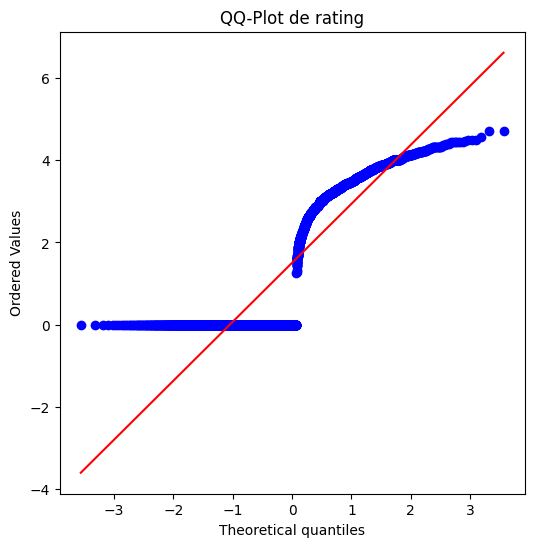

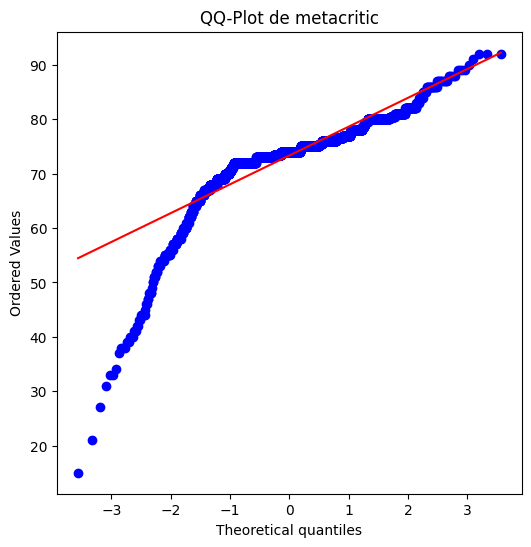

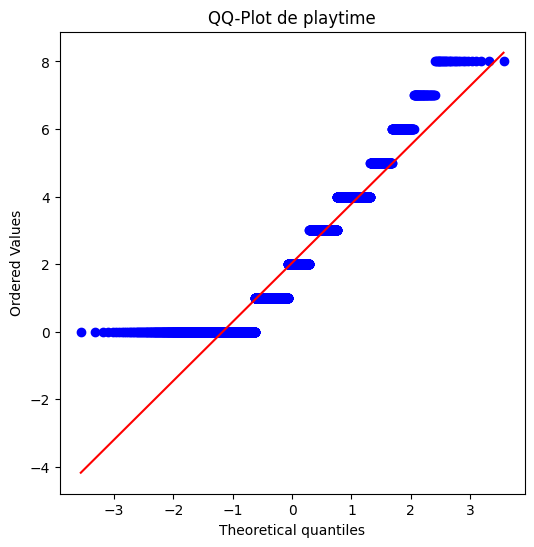

In [30]:
def qq_plot(column):
    plt.figure(figsize=(6,6))
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column}")
    plt.show()

qq_plot('rating')
qq_plot('metacritic')
qq_plot('playtime')


## Interpretación
Los QQ-Plots generados muestran cómo se distribuyen los valores de las siguientes variables en comparación con una distribución normal:

1. **Rating**
2. **Metacritic**
3. **Playtime**

Cada punto en el gráfico representa un cuantil de los datos observados contra el cuantil correspondiente de la distribución normal teórica. 

### ¿Cómo interpretar los resultados?
- **Si los puntos siguen una línea recta (diagonal roja en algunos casos), la variable sigue una distribución normal.**
- **Si los puntos se desvían significativamente de la línea recta, la variable no es normal.**
- **Curvaturas en los extremos indican colas más pesadas o más ligeras que una normal.**
- **Si los puntos presentan una forma en "S", la variable puede tener una distribución sesgada.**

Dado que las pruebas de normalidad previas rechazaron la hipótesis de normalidad, es probable que en estos gráficos los puntos **no sigan una línea recta**, confirmando que las variables **rating, metacritic y playtime no siguen una distribución normal**.

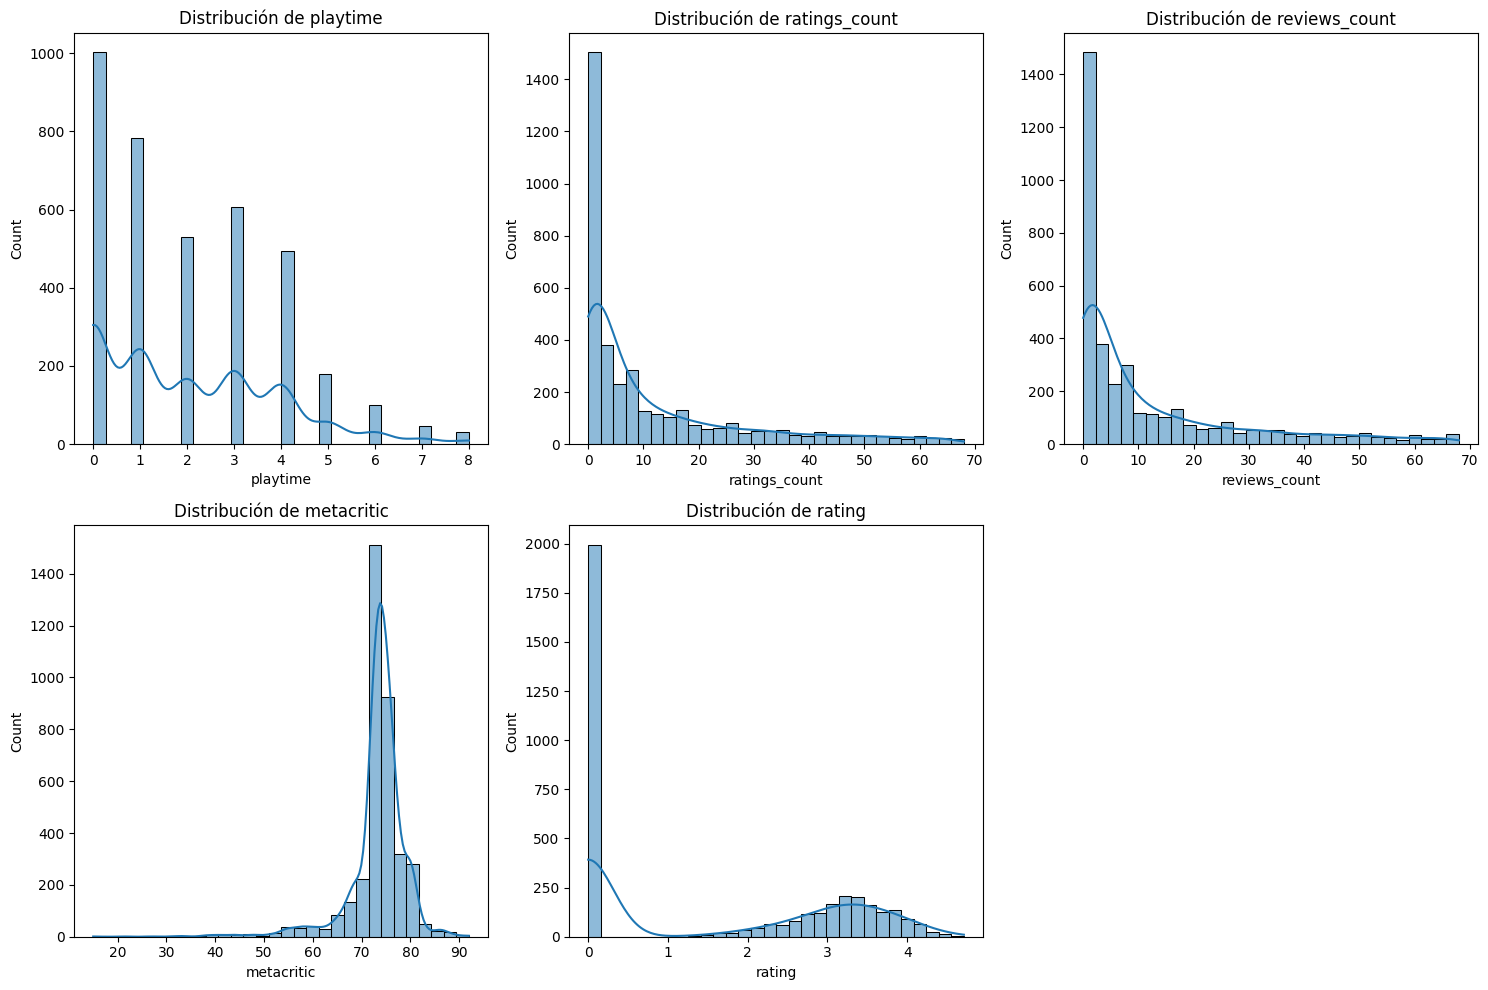

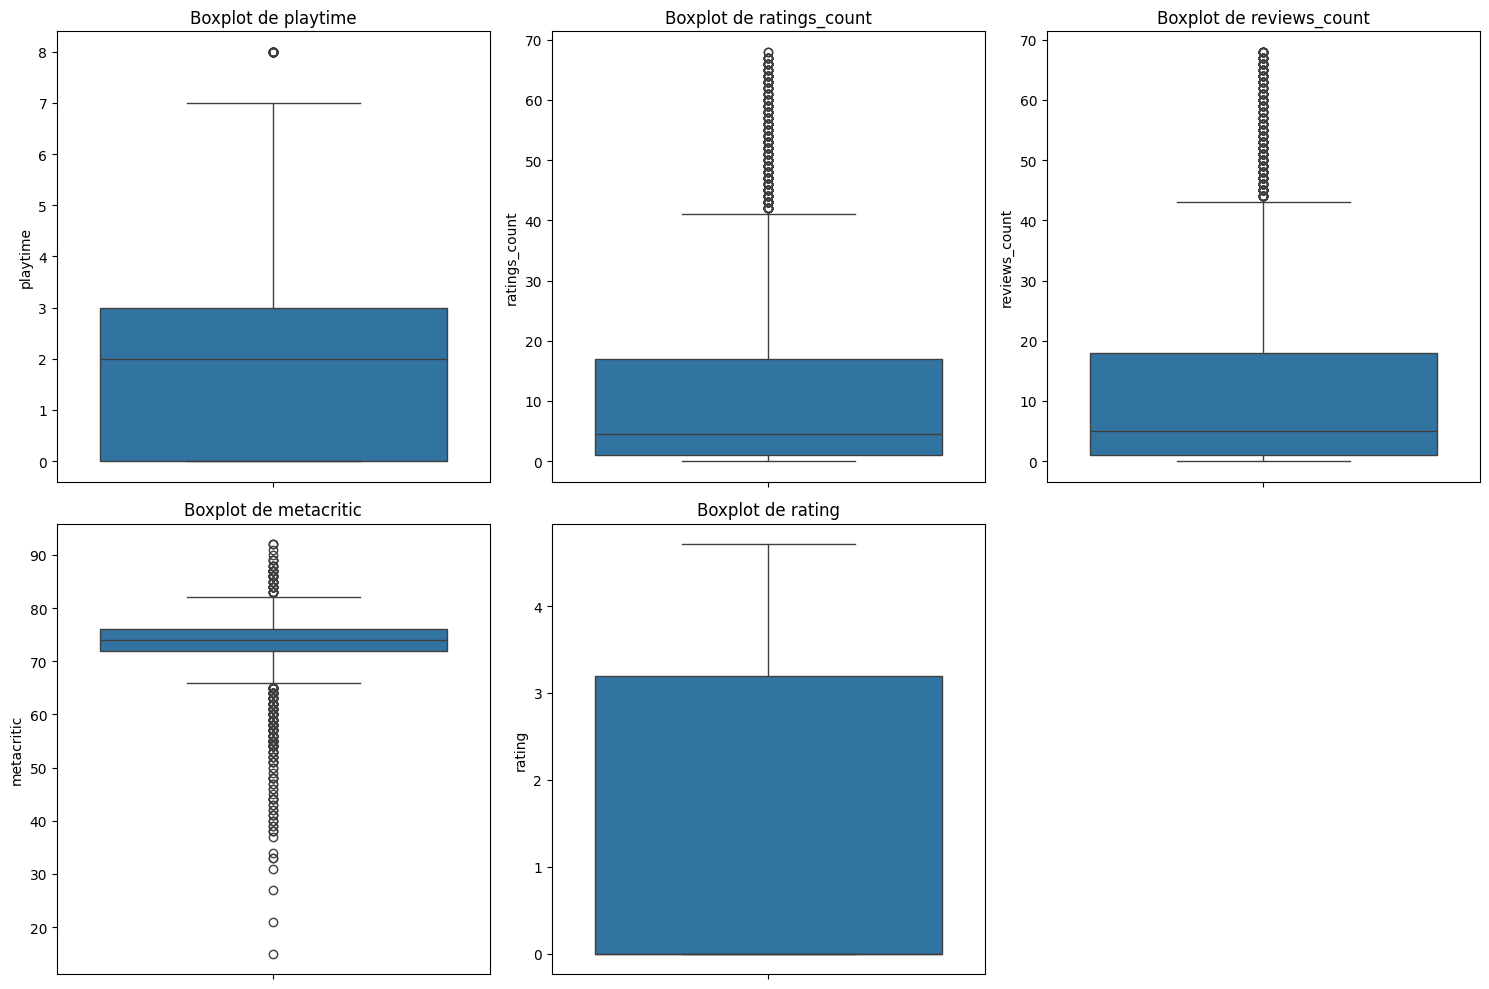

In [31]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


# Violin para visualizar mejor la distribucion

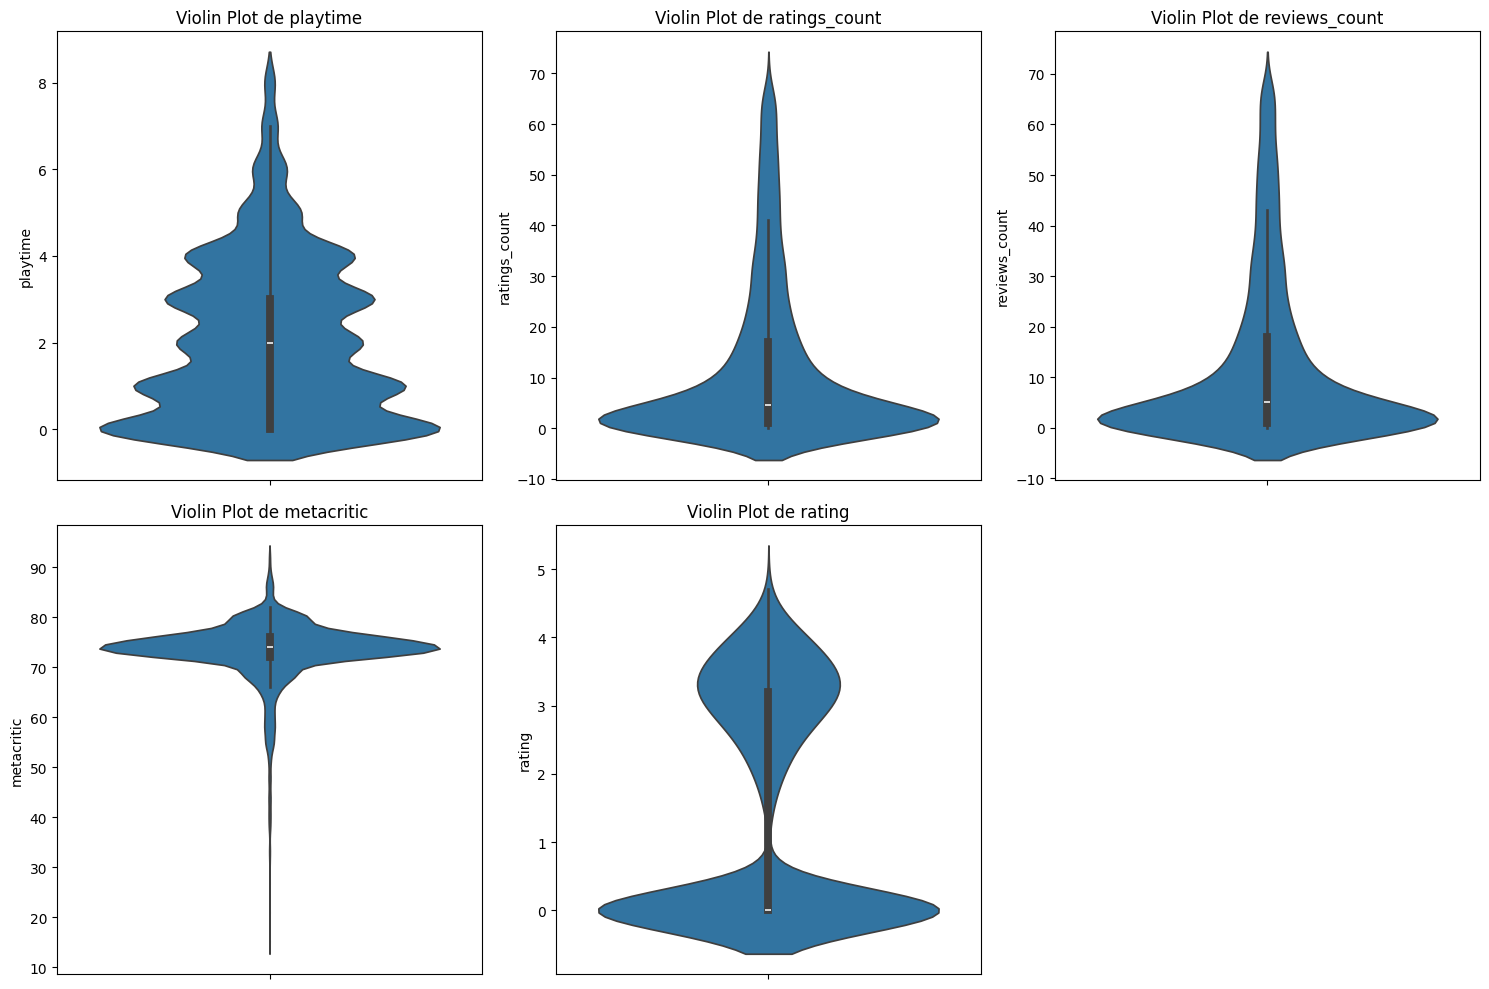

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.violinplot(y=df[col])
    plt.title(f'Violin Plot de {col}')
plt.tight_layout()
plt.show()


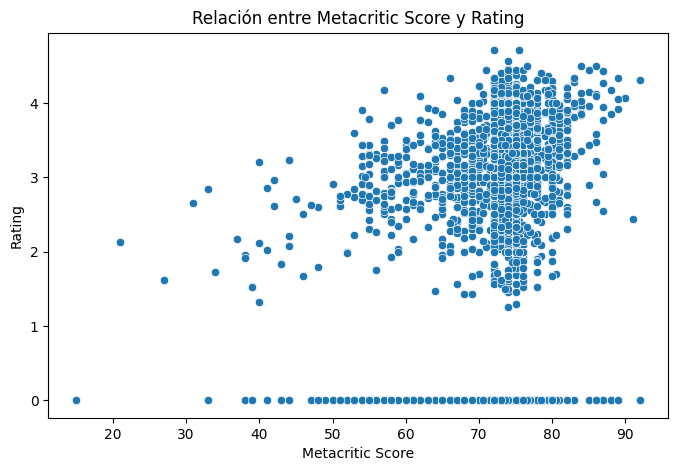

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['metacritic'], y=df['rating'])
plt.title("Relación entre Metacritic Score y Rating")
plt.xlabel("Metacritic Score")
plt.ylabel("Rating")
plt.show()


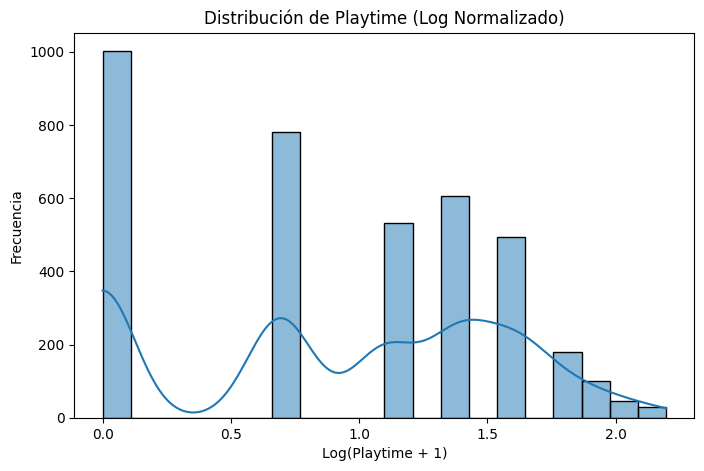

In [34]:
# Normalización logarítmica de playtime
plt.figure(figsize=(8, 5))
df['playtime_log'] = np.log1p(df['playtime'])
sns.histplot(df['playtime_log'], bins=20, kde=True)
plt.title("Distribución de Playtime (Log Normalizado)")
plt.xlabel("Log(Playtime + 1)")
plt.ylabel("Frecuencia")
plt.show()


## Detencion de outliers

In [35]:
def detect_outliers(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_summary[col] = outlier_count
    return pd.DataFrame(outlier_summary.items(), columns=['Variable', 'Outliers'])

outlier_df = detect_outliers(df, numeric_cols)
print(outlier_df)

        Variable  Outliers
0       playtime        30
1  ratings_count       330
2  reviews_count       316
3     metacritic       309
4         rating         0


### Matriz de correlacion con cluster

<Figure size 1200x800 with 0 Axes>

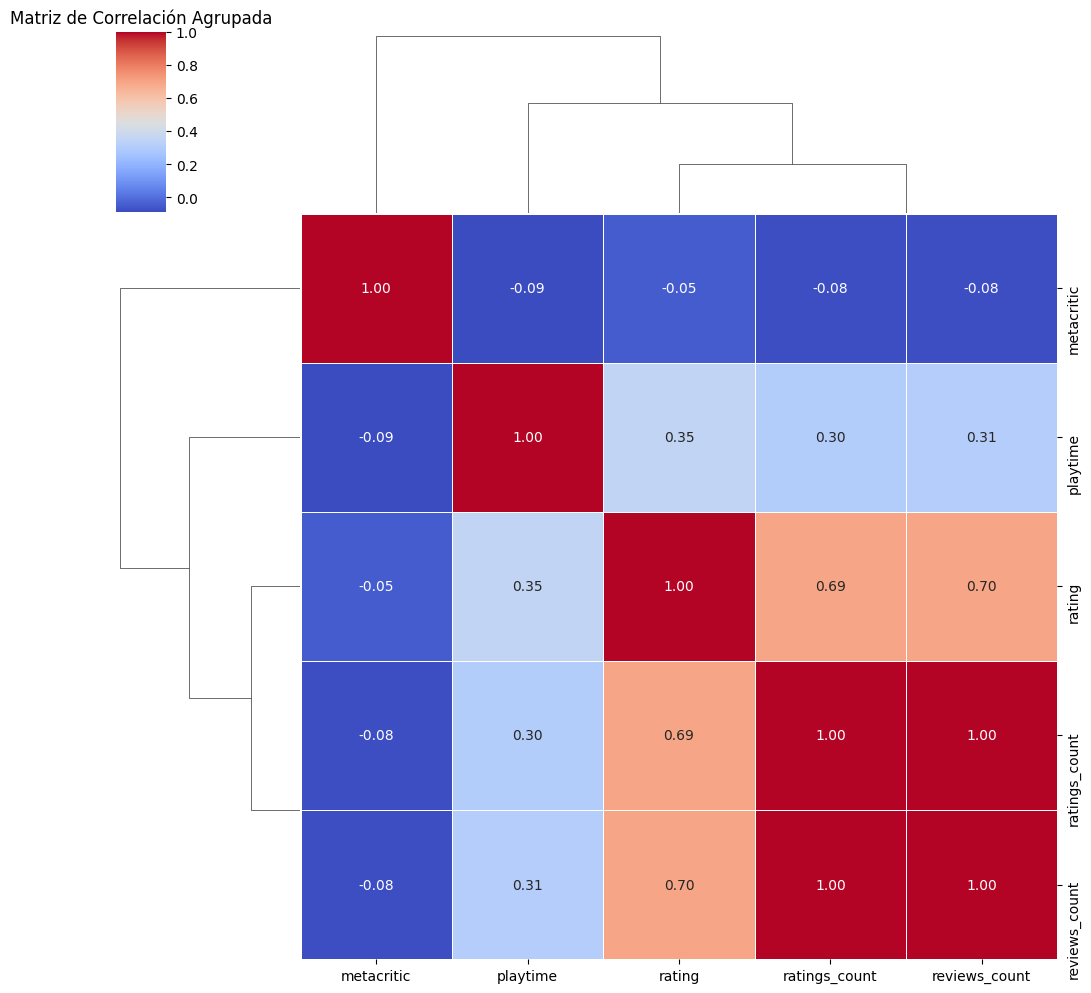

In [36]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.clustermap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Agrupada")
plt.show()

# **¿Qué observar en el gráfico?**
- **Variables altamente correlacionadas (positivamente)**: Si ves dos variables juntas con un color rojo fuerte, significa que tienen una fuerte relación lineal. Ejemplo: si `metacritic` y `rating` tienen una alta correlación, significa que los juegos con mejor puntaje en Metacritic tienden a tener mejores calificaciones de los usuarios.
- **Variables con correlación negativa**: Si hay pares de variables con un color azul intenso, significa que están inversamente relacionadas. Por ejemplo, si `playtime` tuviera una fuerte correlación negativa con `rating`, significaría que los juegos con más horas de juego tienden a tener peores calificaciones.
---
## **Conclusión**
- Este gráfico es útil para identificar **relaciones fuertes** entre variables y posibles problemas de **multicolinealidad**, lo cual es importante en modelos de Machine Learning.
- Las variables agrupadas pueden representar **factores similares**, lo que puede ayudar a reducir la dimensionalidad del análisis.
- Si existen variables con correlaciones extremadamente altas (cercanas a **1** o **-1**), puede ser recomendable eliminar una de ellas para evitar redundancias en el modelo.



# Distribución de juegos por año de lanzamiento

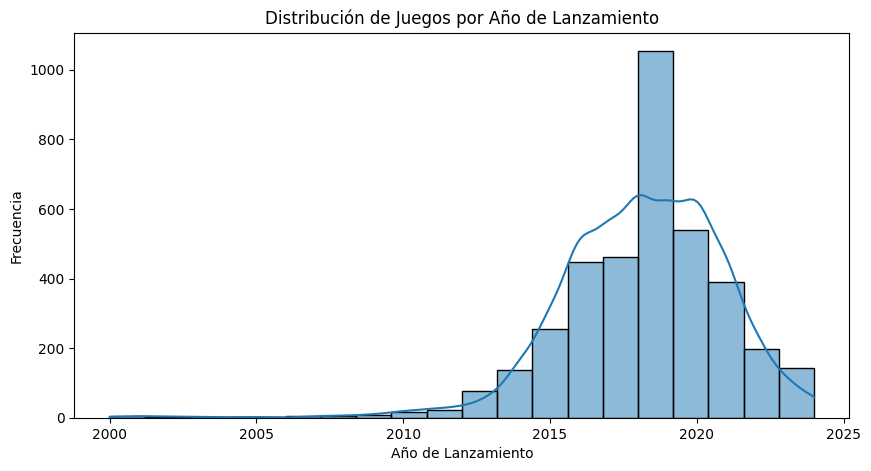

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'].dropna(), bins=20, kde=True)
plt.title("Distribución de Juegos por Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

## Variables categoricas

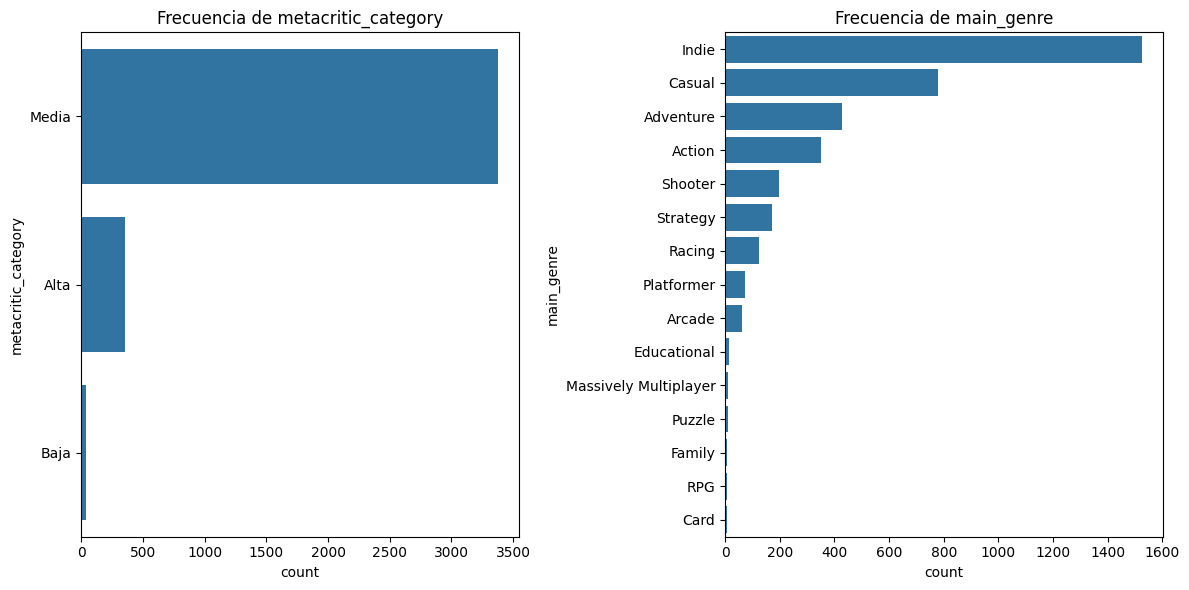

In [38]:
categorical_cols = ['metacritic_category', 'main_genre']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
plt.tight_layout()
plt.show()


## Interpretación del Gráfico
## Para metacritic_category:
- Se puede observar la cantidad de juegos en cada categoría de Metacritic (por ejemplo, "Excelente", "Bueno", "Regular", etc.).
- Si una categoría tiene una frecuencia mucho mayor que las demás, podría indicar que la mayoría de los juegos se agrupan en un solo rango de puntuación.
## Para main_genre:
- Se visualiza la distribución de los géneros principales de los juegos.
- Los géneros con mayor frecuencia indican qué tipos de juegos predominan en el dataset.
- Si un género tiene una presencia muy baja, podría representar un nicho menos explorado en la industria.

## Relacion entre ambas variables

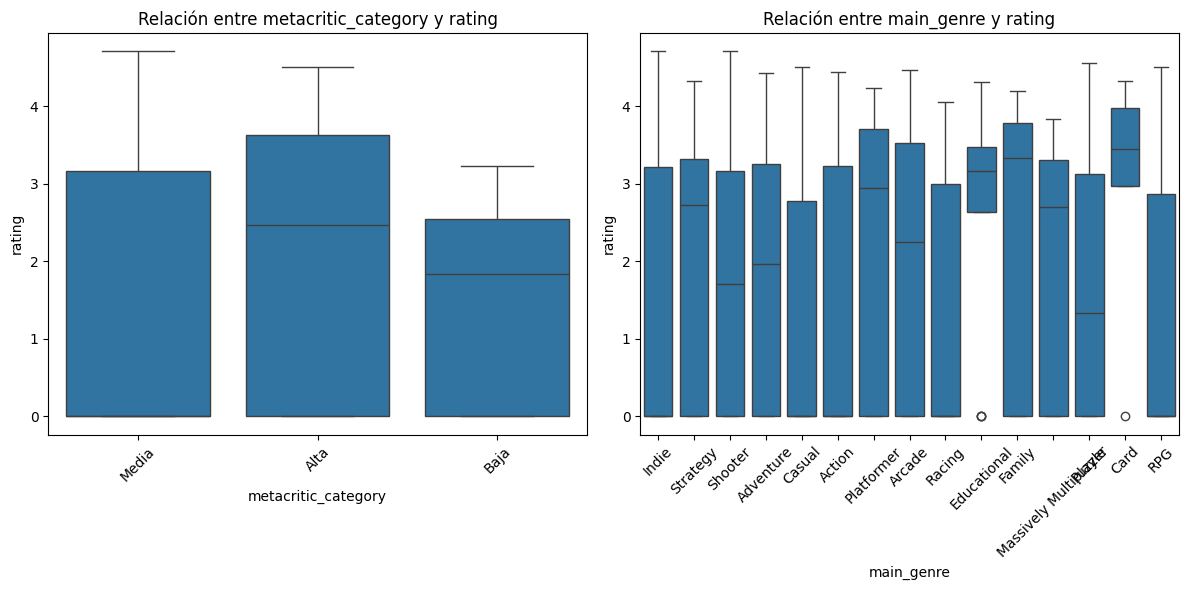

In [39]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.boxplot(x=df[col], y=df['rating'])
    plt.title(f'Relación entre {col} y rating')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Interpretación del Gráfico**
El gráfico de **boxplot** muestra la relación entre las variables categóricas (`metacritic_category` y `main_genre`) y la variable numérica `rating`. 

1. **Para `metacritic_category`**:
   - Permite observar si los juegos con diferentes categorías de Metacritic tienen diferencias significativas en sus calificaciones (`rating`).
   - Si las medianas de los grupos son similares, significa que la categoría de Metacritic no influye mucho en el `rating` de los usuarios.
   - Si hay mucha variabilidad dentro de una categoría, podría indicar que los usuarios no siempre coinciden con la evaluación de Metacritic.

2. **Para `main_genre`**:
   - Muestra la distribución de calificaciones (`rating`) según el género principal del juego.
   - Si algunos géneros tienen una mediana de `rating` más alta que otros, significa que los jugadores tienden a calificar mejor esos géneros.
   - La presencia de **outliers** indica que algunos juegos dentro de un género reciben calificaciones significativamente diferentes al resto.

---

## **Conclusión**
✅ El **boxplot** nos ayuda a entender cómo varía el `rating` de los juegos en función de su género y su clasificación en Metacritic.  
✅ Nos permite identificar **tendencias y patrones** en la calificación de los usuarios con respecto a distintas categorías.  
✅ Si observamos una gran diferencia en las medianas entre categorías, podríamos concluir que la variable categórica tiene un impacto significativo en la calificación.  
✅ En caso de alta dispersión dentro de una categoría, podría indicar que hay **factores adicionales** influyendo en el `rating`, más allá de la clasificación de Metacritic o el género del juego.  

 


# Análisis Bivariado - Dispersión entre variables numéricas

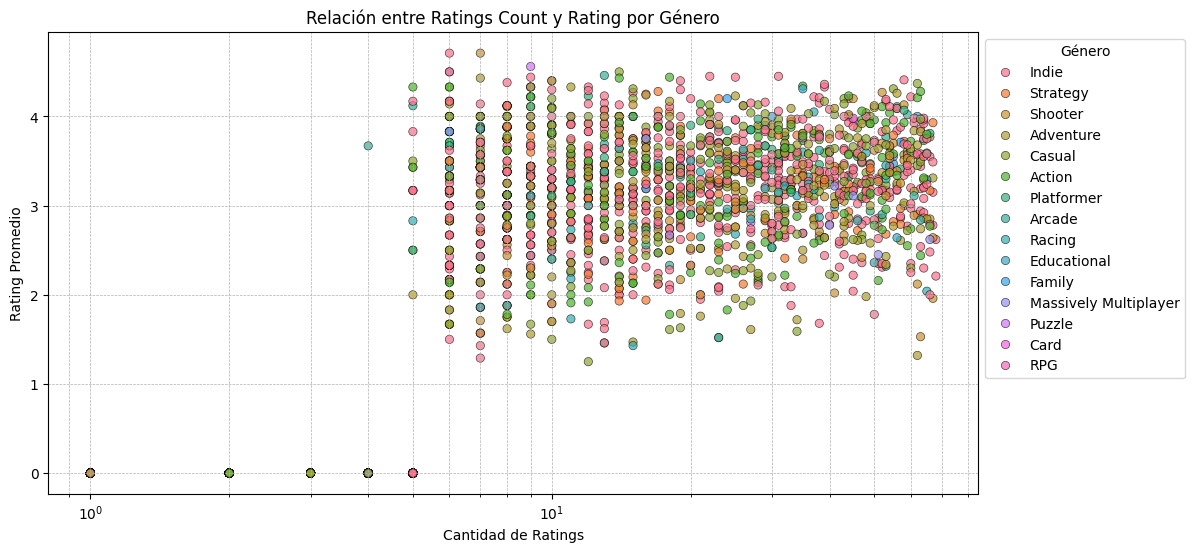

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['ratings_count'], y=df['rating'], hue=df['main_genre'], alpha=0.7, edgecolor='k')
plt.xscale("log")  
plt.xlabel("Cantidad de Ratings")
plt.ylabel("Rating Promedio")
plt.title("Relación entre Ratings Count y Rating por Género")
plt.legend(title="Género", bbox_to_anchor=(1, 1))
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## **Interpretación del Gráfico**
Este **gráfico de dispersión** muestra la relación entre la **cantidad de calificaciones (`ratings_count`)** y el **rating promedio (`rating`)** de los juegos, diferenciando los puntos por género (`main_genre`).

1. **Distribución de los datos**:
   - Se observa que la mayoría de los juegos tienen un número bajo de calificaciones, con solo unos pocos que han recibido muchas.
   - Debido a que el eje **X** está en escala logarítmica (`plt.xscale("log")`), podemos ver mejor la distribución de los juegos con **pocos y muchos ratings**.

2. **Relación entre `ratings_count` y `rating`**:
   - Si se observa una tendencia donde los juegos con más calificaciones tienen valores de `rating` más estables, esto podría indicar que las calificaciones de los usuarios se estabilizan con un mayor número de votos.
   - Si hay alta dispersión en juegos con pocos `ratings_count`, podría significar que los juegos con menos votos tienen una mayor variabilidad en sus calificaciones.

3. **Impacto del Género (`main_genre`)**:
   - Los diferentes colores en el gráfico representan distintos géneros de juegos.
   - Si ciertos géneros tienden a acumular más ratings y mantener un **rating** alto o bajo, esto podría indicar una **preferencia de los usuarios por ciertos géneros**.
   - Algunos géneros pueden mostrar una mayor variabilidad en sus ratings, lo que indicaría que son más polarizantes entre los jugadores.

---

## **Conclusión**
✅ **Los juegos con más `ratings_count` tienden a tener calificaciones más estables**, lo que sugiere que las calificaciones de los usuarios se promedian mejor con más votos.  
✅ **Los juegos con pocos `ratings_count` pueden tener una mayor variabilidad en su `rating`**, lo que indica que pueden estar influenciados por pocas opiniones extremas.  
✅ **Algunos géneros pueden tener más juegos con muchos ratings**, lo que sugiere que son más populares entre los jugadores.  
✅ **El uso de escala logarítmica permite visualizar mejor la tendencia**, evitando que los juegos con pocos ratings dominen la gráfica.  

Este análisis es útil para entender cómo la cantidad de calificaciones puede influir en la percepción general de un juego y cómo diferentes géneros pueden atraer más interacción de los jugadores. 🚀  


# Análisis de Tendencias Temporales

C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3743297377.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='release_year', y='rating', hue='main_genre', ci=None, marker='o')


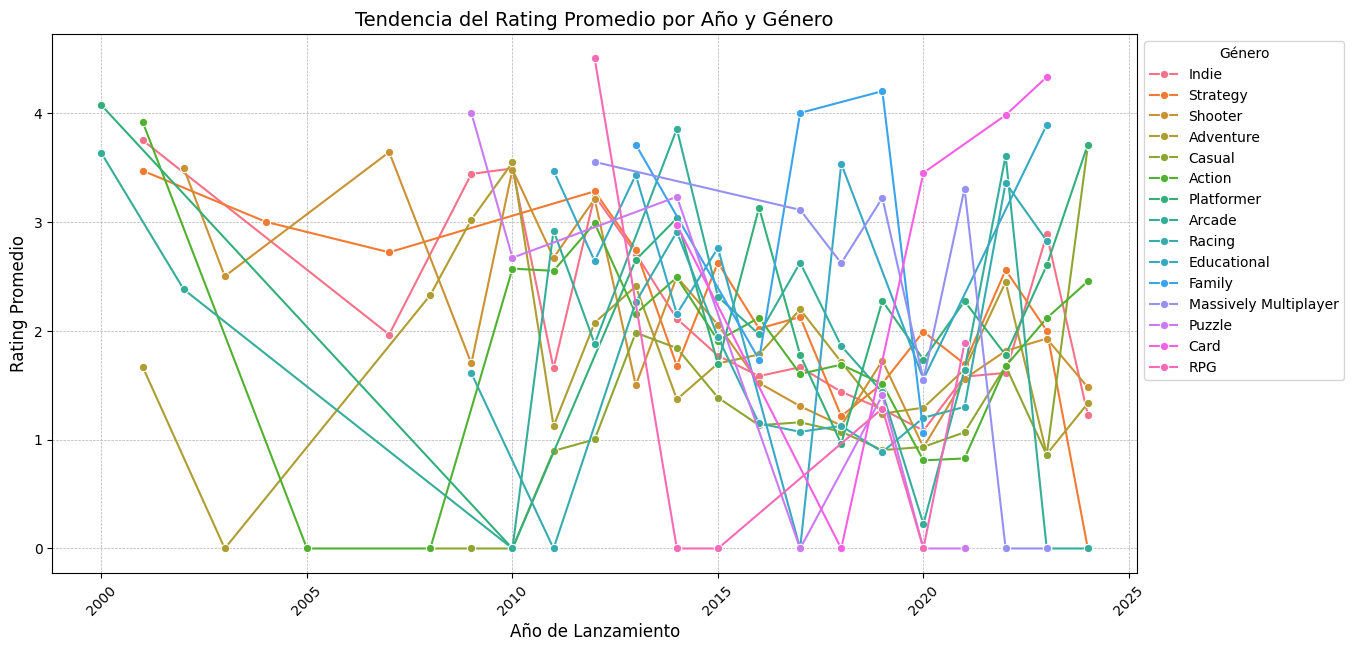

In [ ]:
df['release_year'] = pd.to_datetime(df['released']).dt.year
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='release_year', y='rating', hue='main_genre', ci=None, marker='o')
plt.title("Tendencia del Rating Promedio por Año y Género", fontsize=14)
plt.xlabel("Año de Lanzamiento", fontsize=12)
plt.ylabel("Rating Promedio", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Género", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


# **Interpretación del Gráfico**
Este gráfico de líneas muestra la **tendencia del rating promedio** de los videojuegos a lo largo de los años, diferenciando por género (`main_genre`). 

1. **Eje X (`release_year`)**: Representa el año de lanzamiento de los videojuegos.
2. **Eje Y (`rating`)**: Representa la calificación promedio de los juegos lanzados en cada año.
3. **Líneas de colores**: Cada línea representa un género de videojuegos, permitiendo comparar la evolución de las calificaciones a lo largo del tiempo.
4. **Puntos (`marker='o'`)**: Indican los valores específicos del rating en cada año.
5. **Sin intervalo de confianza (`ci=None`)**: Se muestra solo la línea de tendencia sin sombreado de variabilidad.

### **¿Qué información nos da este gráfico?**
- **Variabilidad de ratings a lo largo del tiempo**: Permite ver si la calificación promedio de los juegos ha aumentado, disminuido o se ha mantenido estable en los distintos años.
- **Comparación entre géneros**: Nos ayuda a identificar si ciertos géneros han mantenido un alto puntaje a lo largo del tiempo o si han sufrido cambios drásticos en su evaluación.
- **Picos y caídas**: Si hay años donde los ratings suben o bajan significativamente, podría indicar tendencias en la industria del gaming (por ejemplo, la popularidad de ciertos géneros en ciertas épocas).
- **Géneros con mejor o peor recepción**: Al observar líneas consistentemente más altas o bajas, podemos identificar qué géneros suelen recibir mejores calificaciones de los jugadores.

---

# **Conclusión**
✅ **Permite analizar la evolución de las calificaciones de los videojuegos a lo largo del tiempo**.  
✅ **Identifica tendencias por género**, ayudando a comprender qué tipos de juegos han sido mejor recibidos en diferentes épocas.  
✅ **Ayuda a detectar posibles patrones de la industria** como la popularidad creciente o decreciente de ciertos géneros en ciertos períodos.  
✅ **Si algunas líneas muestran grandes variaciones en ciertos años**, podría ser relevante investigar si esos cambios se deben a eventos clave en la industria del gaming.  


# Comparación de Distribuciones Entre Categorías

C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
C:\Users\anoni\AppData\Local\Temp\ipykernel_3652\3858205217.py:4: FutureWarning: 

`shade` is 

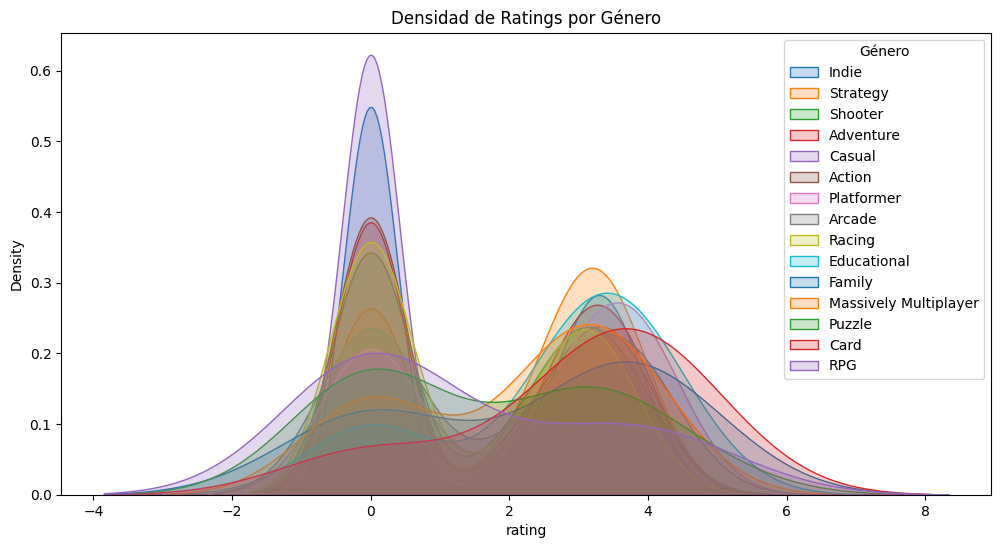

In [ ]:
plt.figure(figsize=(12, 6))
for genre in df['main_genre'].unique():
    sns.kdeplot(df[df['main_genre'] == genre]['rating'], label=genre, shade=True)
plt.title("Densidad de Ratings por Género")
plt.legend(title="Género")
plt.show()

# **Interpretación del Gráfico**
Este gráfico de **densidad de ratings por género** utiliza **Kernel Density Estimation (KDE)** para visualizar la distribución de calificaciones (`rating`) de los videojuegos según su género (`main_genre`).

### **¿Qué representa el gráfico?**
1. **Eje X (`rating`)**: Representa la calificación de los videojuegos.
2. **Eje Y (densidad estimada)**: Representa la proporción de juegos dentro de cada género con un determinado `rating`.
3. **Líneas de colores**: Cada curva representa la distribución de calificaciones para un género específico.
4. **Sombreado (`shade=True`)**: Resalta el área bajo la curva para una mejor visualización de la densidad.

### **¿Cómo interpretar las curvas?**
- **Picos altos**: Indican que hay una gran cantidad de juegos de ese género con un `rating` específico.
- **Distribución ancha**: Sugiere que los ratings de los juegos en ese género varían mucho.
- **Distribución estrecha**: Indica que la mayoría de los juegos en ese género tienen calificaciones similares.
- **Si una curva está desplazada hacia la derecha**, significa que los juegos de ese género tienden a recibir calificaciones más altas.
- **Si está desplazada hacia la izquierda**, significa que esos juegos suelen tener calificaciones más bajas.

---

# **Conclusión**
✅ **Permite visualizar cómo se distribuyen los ratings entre los diferentes géneros de videojuegos**.  
✅ **Identifica qué géneros suelen recibir mejores o peores calificaciones** en promedio.  
✅ **Detecta variabilidad dentro de cada género**, mostrando si algunos géneros tienen una distribución uniforme de calificaciones o si la mayoría de sus juegos reciben puntuaciones similares.  
✅ **Si las distribuciones de algunos géneros se solapan**, indica que esos géneros tienen una calificación similar y no hay una diferencia significativa en la percepción de los jugadores.  

